# Machine Learning

Up till now, we've seen the tools necessary to solve a variety of problems. These problems, however, need to have a **finite** number of steps and states, so that we can account for each one. We need to define a set of rules; rules we can code, so that in every possible scenario our algorithm comes up with an answer. With our current knowledge we can't solve a problem with an **indefinite** number of states (e.g. a chess match). These algorithms, we can write are called **deterministic**. In contrast, there is another category of algorithms called **non-deterministic**, whose response is not hard-coded and can differ from run to run, even on the same input. Machine Learning (ML) will help us with the latter.

> Machine Learning explores the study and construction of algorithms that can learn from and make predictions on data.

So how does ML attempt to solve complex problems? Much like humans do, through trial and error! It learns to make associations from the data itself, without having any expert define or dictate a set of rules. These are formed on their own, through a procedure we call **training**. Let's not get too ahead of ourselves.

A more formal definition of Machine Learning is the following:

> A computer program is said to learn from experience (*E*) with respect to some class of tasks (*T*) and performance measure (*P*) if its performance at tasks in *T*, as measured by *P*, improves with experience *E*.

Let's try to break this down a bit:

- The class of tasks (*T*), refers to the type of the problem (classification, clustering, etc.).
- The performance measure (*P*) is a function that indicates how **well** the algorithm is doing in its task.
- Experience (*E*), in the context of **training**, refers to the algorithm improving its performance on the task. 

Machine learning tasks fall into 3 broad categories:

- **Supervised Learning**. Here the algorithm is presented with **labeled** data. It is the algorithm's job to associate the input with their labels. Classification and regression problems fall into this category.
- **Unsupervised Learning**. The data in these types of problems has **no** labels. The algorithms job is to find patterns or clusters in the data. Clustering, density estimation and dimensionality reduction problems fall into this category.
- **Reinforcement Learning**. The algorithm interacts with a dynamic environment in which it must perform a certain goal.

The most popular category of Machine Learning is supervised learning.

# Supervised Learning

In this category we have a set of examples (or samples) $X$ and their labels (or targets) $Y$. The goal of the algorithm is to learn from $X$ and $Y$ in order to be able to predict the labels of future unseen examples.

- If $Y$ is discrete, the problem we are trying to solve is called **classification**
- If $Y$ is continuous, we are trying to solve a **regression** problem.

## Regression: Linear Regression

The simplest problem we can solve is a linear regression problem.

> In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable $y$ and one or more explanatory variables (or independent variables) denoted $x$.

In the context of ML we usually refer to $x$ as a **training example** and $y$ as its **label**. Basically, we have $(x,y)$ data and try to find the line that fits this data the best.

Let's define our problem:  
We'll take $100$ samples evenly distributed in $[0,100)$. These samples follow an underlying linear distribution but are infused with noise. The goal is to find a line that best *fits* the data.

Text(0.5,1,'Training examples and their labels')

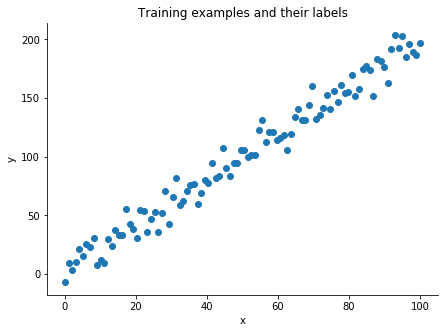

In [1]:
#                                                  CODE:
#                              --------------------------------------------

from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ensure reproducability
seed = 13
np.random.seed(seed)

# Construct data
x = np.linspace(0, 100, 100)  # training examples
y = 2 * x + 10 * np.random.normal(size=100)  # labels

#                                                PLOTTING:
#                              --------------------------------------------

# Create figure
fig = plt.figure(figsize=(7, 5))
ax = plt.subplot(111)

# Scatter data points
ax.scatter(x, y, c='#1f77b4')

# Aesthetic parameters
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('Training examples and their labels')

As we previously said, we are essentially looking for a line that best *fits* the data. A line is defined as $y = w \cdot x + b$, so we need to figure out. We'll draw a few lines to see the differences:

Text(0.5,1,'Data points and random lines')

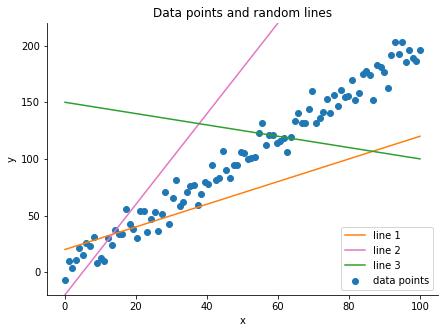

In [2]:
#                                                  CODE:
#                              --------------------------------------------

# Line 1
w1 = 1
b1 = 20
y1 = w1 * x + b1

# Line 2
w2 = 4
b2 = -20
y2 = w2 * x + b2

# Line 3
w3 = -0.5
b3 = 150
y3 = w3 * x + b3

#                                                PLOTTING:
#                              --------------------------------------------

# Create figure
fig = plt.figure(figsize=(7, 5))
ax = plt.subplot(111)

# Scatter data points
ax.scatter(x, y, c='#1f77b4', label='data points')

# Draw the three lines
ax.plot(x, y1, c='#ff7f0e', label='line 1')
ax.plot(x, y2, c='#e377c2', label='line 2')
ax.plot(x, y3, c='#2ca02c', label='line 3')

# Aesthetic parameters
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_ylim([-20, 220])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(loc='lower right')

ax.set_title('Data points and random lines')

Now, to our question at hand. Which of these three lines best *fits* the data?  
Well, first it would help if we specify what we mean by the word *fits* more clearly. Or even better, if we can somehow **quantify** it. What we essentially need is a measure of how *close* the line is to the data. In the context of Machine Learning, we refer to this *measure* as a **performance metric**. This is one of the most important parts of machine learning, as it gives us a way of telling how *well* our algorithm is doing, or how *close* it is to reaching its goal; but most importantly is gives us a way to tell if our algorithm is *improving* or not!

In this case we will select the [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE) as our performance metric:

$$
MSE = \frac{1}{N} \cdot \sum_{i=1}^N{\left( y_i - \hat y_i \right) ^2}
$$

where $N$ is the number of samples, $y_i$ is the label for data point $x_i$ and $\hat y_i$ is the *prediction* for the same data point.

The smaller the MSE, the closer the line is our data.

In [3]:
#                                                  CODE:
#                              --------------------------------------------

def mse(y, y_hat):
    """
    Calculates the Mean Squared Error between the labels (y) and the predictions (y_hat)
    """
    return ((y - y_hat)**2).sum() / len(y)

print('line1 MSE:', mse(y, y1))
print('line2 MSE:', mse(y, y2))
print('line3 MSE:', mse(y, y3))

line1 MSE: 1802.4096380013298
line2 MSE: 9934.38656402079
line3 MSE: 5821.561278104836


Judging by this `line1` is the best of the three.

Now that we've clearly defined our goal (i.e. to achieve the lowest possible MSE), we can move on to creating a Linear Regression model that will do exactly that, find the line that minimizes the MSE.

The first step in most Machine Learning algorithms is to **initialize** them, or set a starting point. This can be done simply by selecting random values for our two parameters $w$ and $b$.

As a note here, the parameters $w$ and $b$ are referred to as **weights** and **biases**, while the output of the model (in this case $\hat y = w \cdot x + b$ is called a **prediction** or **hypothesis**.

Text(0.5,1,'Linear Regression (random initialization)')

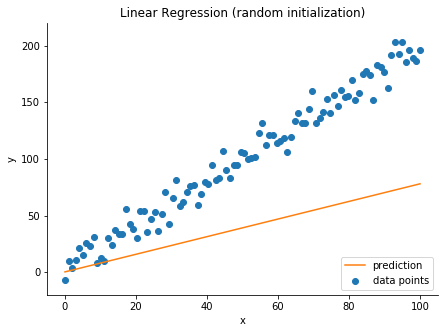

In [4]:
#                                                  CODE:
#                              --------------------------------------------

np.random.seed(seed)

# Initialize w and b randomly
w = np.random.random()
b = np.random.random()

# Create a function that makes predictions based on the weights and biases
def predict(x):
    """
    Returns the predictions for x, based on the weights (w) and the biases (b)
    """
    return w * x + b

# Generate a prediction
y_hat = predict(x)

#                                                PLOTTING:
#                              --------------------------------------------

# Create figure
fig = plt.figure(figsize=(7, 5))
ax = plt.subplot(111)

# Scatter data points
ax.scatter(x, y, c='#1f77b4', label='data points')

# Draw the prediction
ax.plot(x, y_hat, c='#ff7f0e', label='prediction')

# Aesthetic parameters
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_ylim([-20, 220])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(loc='lower right')

ax.set_title('Linear Regression (random initialization)')

Initially, as we can see, the model isn't fairing so well.

Now, begins the **training phase** of the algorithm, where it will begin improving until some criterion is met. The performance metric that is used to improve the algorithm's performance upon is called a **cost** (or **loss**) **function**. Thus, our goal is to **minimize** this cost function.

If we look at this in a bit more detail, the cost function (denoted as $J$) is a function with two parameters: $w$ and $b$:

$$
J(w, b) = 
\frac{1}{2N} \cdot \sum_{i=1}^N{\left( y_i - \hat y_i \right) ^2} = 
\frac{1}{2N} \cdot \sum_{i=1}^N{\left( y_i - w \cdot x_i - b \right) ^2}
$$

To get a better understanding of how the cost function works, we'll first see the impact each parameter has on it, while keeping the other constant.

Text(0.5,1,'Cost with respect to $b$ ')

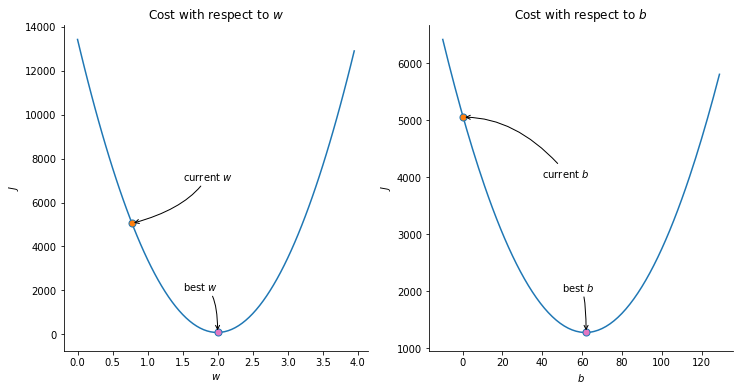

In [5]:
#                                                  CODE:
#                              --------------------------------------------

# calculate current cost
J = mse(y, y_hat)

# calculate the cost for different values of w
w_range = np.arange(0, 4, 0.05)
y_w = [v * x + b for v in w_range]
J_w = [mse(y, v) for v in y_w]
w_best = w_range[np.argmin(J_w)]

# calculate the cost for different values of b
b_range = np.arange(-10, 130, 1)
y_b = [w * x + v for v in b_range]
J_b = [mse(y, v) for v in y_b]
b_best = b_range[np.argmin(J_b)]

#                                                PLOTTING:
#                              --------------------------------------------

# Create figure
fig = plt.figure(figsize=(12, 6))

# Subplot 1
ax1 = plt.subplot(121)

# Draw artists for subplot 1
ax1.plot(w_range, J_w, c='#1f77b4', zorder=-1)  # cost curve
ax1.scatter(w, J, c='#ff7f0e', s=50, edgecolor='#1f77b4')  # current w
ax1.scatter(w_best, min(J_w), c='#e377c2', s=50, edgecolor='#1f77b4')  # best w
ax1.annotate('current $w$', xy=(w, J), xytext=(1.5, 7000),
             arrowprops=dict(arrowstyle='->',
             connectionstyle="angle3,angleA=60,angleB=15"))
ax1.annotate('best $w$', xy=(w_best, min(J_w)), xytext=(1.5, 2000), 
             arrowprops=dict(arrowstyle='->',
             connectionstyle="angle3,angleA=0,angleB=-90"))

# Subplot 1 - aesthetic parameters
ax1.set_xlabel('$w$')
ax1.set_ylabel('$J$')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

ax1.set_title('Cost with respect to $w$ ')

# Subplot 2
ax2 = plt.subplot(122)

# Draw artists for subplot 2
ax2.plot(b_range, J_b, c='#1f77b4', zorder=-1)
ax2.scatter(b, J, c='#ff7f0e', s=50, edgecolor='#1f77b4')
ax2.scatter(b_best, min(J_b), c='#e377c2', s=50, edgecolor='#1f77b4')
ax2.annotate('current $b$', xy=(b, J), xytext=(40, 4000), 
             arrowprops=dict(arrowstyle='->',
             connectionstyle="angle3,angleA=-50,angleB=0"))
ax2.annotate('best $b$', xy=(b_best, min(J_b)), xytext=(50, 2000),
             arrowprops=dict(arrowstyle='->',
             connectionstyle="angle3,angleA=0,angleB=-90"))

# Subplot 2 - aesthetic parameters
ax2.set_xlabel('$b$')
ax2.set_ylabel('$J$')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

ax2.set_title('Cost with respect to $b$ ')

The two figures above illustrate how the cost changes with respect to each of the two variables. Our starting position is also depicted in the two figures, as well as our *goal* (the value of each parameter that minimizes the cost function). In this problem it isn't so hard to calculate the cost for every parameter and draw the curves, however this is **impossible** in more complex problems. 

Furthermore, the previous figures assume we optimize each parameter independent of the other. Preferrably, we'd want to optimize them together. 

![cost function](https://i.imgur.com/hizeAC7.png)

In the figure above, the darker the color the lower the value of the cost function. Again, we need a way to navigate from the *current position* (acquired from the random initialization of our two parameters $w$ and $b$) to the *best position* (a position that is unknown in real world problems).

One way to tackle this is through **[Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)**.

How does this work?  
By computing the **gradients of the cost function w.r.t each of the parameters**, we are essentially calculating the *slope* of this function at our current position. The slope, in turn, shows us the *direction* that will reduce the cost function's value! The two partial derivatives we need to compute are the following:

$$ \frac{dJ}{dw} \quad and \quad \frac{dJ}{db} $$

Afterwards, we need to change the values of our parameters $w$ and $b$, in such a way to *move in that direction*. This change is called an **update**.

$$ w^{new} \leftarrow w + λ \cdot \frac{dJ}{dw} \quad and \quad b^{new} \leftarrow b + λ \cdot \frac{dJ}{db}$$

After the first update, a new prediction is made (using the new values of our two parameters), the new cost is calculated, the derivatives are computed once again and a new update is made. These steps are repeated again and again, until the cost function stops dropping. This procedure is referred to as the **training phase**.

Another term we use in machine learning is the term **epoch**. An epoch is when an algorithm has *seen* all of the training data once and has updated its parameters accordingly. In this case, an epoch is concluded each time the weights are updated.  

An example training phase can be seen in the figure below.

![gradient descent](https://i.imgur.com/vJ8fbyO.png)

The $λ$ parameter we saw before is called the **learning rate** and dictates how *large* will each update will be. Too small and we will require many steps to reach our goal; too large and we might *overshoot* the minima and the algorithm might never converge. This can be seen in the figure below:

![learning rates](https://i.imgur.com/6KnQu6V.png)

The partial derivatives in linear regression are:

$$
\frac{dJ}{dw} = - \frac{2}{N} \cdot \sum_{i=1}^N x_i \left(y_i - w \cdot x_i - b \right) \\
\frac{dJ}{db} = - \frac{2}{N} \cdot \sum_{i=1}^N \left(y_i - w \cdot x_i - b \right) 
$$

Text(0.5,1,'Linear Regression (first four epochs)')

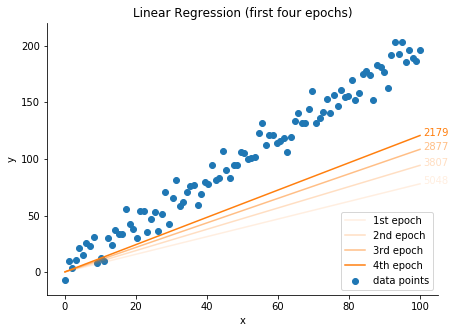

In [6]:
#                                                  CODE:
#                              --------------------------------------------

# Create two functions that will help us train the algorithm

def compute_derivatives(x, y):
    """
    First generate a prediction for x and then compute the derivatives of
    the cost function with respect to the weights (w) and the biases (b).
    """
    y_hat = predict(x)
    dw = - (2 / sum(x)) * sum(x * (y - y_hat))
    db = - (2 / sum(x)) * sum(y - y_hat)
    return dw, db

def update(x, y, lr=0.001):
    """
    Generates a prediction for x, computes the partial derivatives of the 
    cost function and uses them to update the values of the weights (w)
    and biases (b) according to learning rate (lr). It doesn't overwrite 
    the old parameters; instead it returns the new values.
    """
    dw, db = compute_derivatives(x, y)
    new_w = w - (lr * dw)
    new_b = b - (lr * db)
    return new_w, new_b

# The initial weights and biases are stored in the variables 'w' and 'b'.

# We'll now calculate the weights and biases of the second epoch
# (after the first update)

w1, b1 = w, b        # parameters of the 1st epoch
y1 = predict(x)      # initial prediction
J1 = mse(y, y1)      # initial cost
w, b = update(x, y)  # overwrite the old parameters

# Same thing for the third and fourth epochs

w2, b2 = w, b    # parameters of the 2nd epoch
y2 = predict(x)  # 2nd epoch prediction
J2 = mse(y, y2)  # 2nd epoch cost
w, b = update(x, y) 

w3, b3 = w, b    # parameters of the 3rd epoch
y3 = predict(x)  # 3rd epoch prediction
J3 = mse(y, y3)  # 3rd epoch cost
w, b = update(x, y) 

w4, b4 = w, b    # parameters of the 4th epoch
y4 = predict(x)  # 4th epoch prediction
J4 = mse(y, y4)  # 4th epoch cost

#                                                PLOTTING:
#                              --------------------------------------------

# Create figure
fig = plt.figure(figsize=(7, 5))
ax = plt.subplot(111)

# Scatter data points
ax.scatter(x, y, c='#1f77b4', label='data points')

# Draw the predictions for the first four epochs
ax.plot(x, y1, c='#ff7f0e', label='1st epoch', alpha=1/8)
ax.plot(x, y2, c='#ff7f0e', label='2nd epoch', alpha=1/4)
ax.plot(x, y3, c='#ff7f0e', label='3rd epoch', alpha=1/2)
ax.plot(x, y4, c='#ff7f0e', label='4th epoch')

# Write the cost of each prediction next to it
ax.text(len(x)+1, y1[-1], str(int(J1)), color='#ff7f0e', alpha=1/8)
ax.text(len(x)+1, y2[-1], str(int(J2)), color='#ff7f0e', alpha=1/4)
ax.text(len(x)+1, y3[-1], str(int(J3)), color='#ff7f0e', alpha=1/2)
ax.text(len(x)+1, y4[-1], str(int(J4)), color='#ff7f0e')

# Aesthetic parameters
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_ylim([-20, 220])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(loc='lower right')

ax.set_title('Linear Regression (first four epochs)')

It's clear that the model is improving after each epoch, evident by the fact that both the prediction approaches what it should be and that the cost is dropping.

Now, we can finally put it all together and create a Linear Regression class.

In [7]:
#                                                  CODE:
#                              --------------------------------------------

class LinearRegression:
    
    def __init__(self, epochs=100, learning_rate=0.001, random_seed=13):
        """
        This class creates a Linear Regression model and attempts  
        to fit it to the given data through gradient descent.
        :param epoch (int): The number of epochs.
        :param learning_rate (float): The learning rate of the algorithm.
        :param random_seed (int): A number to used as the seed for the random number generator.
        """
        self.epochs = epochs
        self.lr = learning_rate
        self.w, self.b = self.initialize(random_seed)
        self.w_history = []
        self.b_history = []
        
    def initialize(self, seed):
        """
        Method that initializes the weights and biases to random values.
        """
        np.random.seed(seed)
        w = np.random.random()
        b = np.random.random()
        return w, b
    
    def predict(self, x):
        """
        Method that makes predictions for a number of points.
        """
        return self.w * x + self.b
    
    def cost(self, x, y):
        """
        Method that calculates the cost of the prediction on a series of data points.
        """
        y_hat = self.predict(x)
        return sum(((y - y_hat)**2)) / len(y)
    
    def update(self, x, y):
        """
        Method that runs one iteration of gradient descent and updates the class' weights and biases
        """
        y_hat = self.predict(x)    
        dw = - (2 / sum(x)) * sum(x * (y - y_hat))
        db = - (2 / sum(x)) * sum(y - y_hat)
        self.w -= (self.lr * dw)
        self.b -= (self.lr * db)
        
    def fit(self, x, y):
        """
        Method that handles the whole training procedure.
        """
        for ep in range(self.epochs):
            self.w_history.append(self.w)
            self.b_history.append(self.b)
            self.update(x, y)     

Let's see if it works.

Text(0.5,1,'Linear Regression (first 15 epochs)')

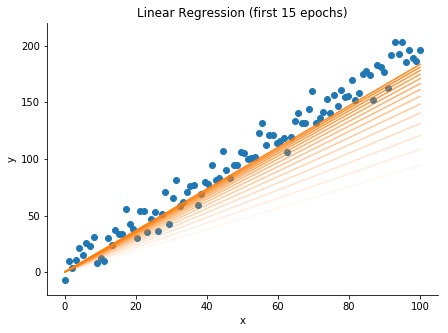

In [8]:
#                                                  CODE:
#                              --------------------------------------------

model = LinearRegression(epochs=15)
model.fit(x, y)

#                                                PLOTTING:
#                              --------------------------------------------

# Create figure
fig = plt.figure(figsize=(7, 5))
ax = plt.subplot(111)

# Scatter data points
ax.scatter(x, y, c='#1f77b4', label='data points')

# Draw the predictions for the first four epochs
predictions = [model.w_history[i] * x + model.b_history[i] for i in range(len(model.w_history))]

for i in range(len(model.w_history)):
    ax.plot(x, predictions[i], c='#ff7f0e', alpha=i/len(predictions))

# Aesthetic parameters
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_ylim([-20, 220])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('Linear Regression (first {} epochs)'.format(model.epochs))

## Multi-variable Linear Regression

What happens if we have more than one input variables?  
Not much actually changes, apart from the fact that we now have a separate weight for each input variable. Variables are often referred to as **features** in Machine Learning.

Suppose we have a dataset of $N$ training examples, each consisting of $M$ features. We could represent the training data as an $N \times M$ array $X$: 

$$
X = \left( \begin{array}{cccc}
x_{11} & x_{12} & ... & x_{1M} \\
x_{21} & x_{22} & ... & x_{2M} \\
... & ... & ... & ... \\
x_{N1} & x_{N2} & ... & x_{NM} 
\end{array} \right)
$$

Each example ($X_i$) is accompanied by a label ($y_i$), like before:

$$
y = \left( \begin{array}{c}
y_1 \\
y_2 \\
... \\
y_N
\end{array} \right)
$$

Each prediction is essentially a linear combination of all the features for the input example. **Each feature has its own weight**:

$$
\hat y_i = x_{i1} \cdot w_{1} + x_{i2} \cdot w_{2} + ... + x_{iM} \cdot w_{M} + b
$$

The whole prediction array would look like this:

$$
\hat y = X \cdot W + b = \left( \begin{array}{cccc}
x_{11} & x_{12} & ... & x_{1M} \\
x_{21} & x_{22} & ... & x_{2M} \\
... & ... & ... & ... \\
x_{N1} & x_{N2} & ... & x_{NM} 
\end{array} \right) \cdot
\left( \begin{array}{cccc}
w_1 \\
w_2 \\
... \\
w_M
\end{array} \right) + b
$$

The final $+$ operation is possible through broadcasting. The mathematical equivalent would be if $b$ was a $1 \times N$ array $\left( \begin{array}{cccc} b & b & ... & b \end{array} \right)^T$.

## Linear Regression Discussion

Linear regression is a very simple algorithm that usually doesn't work well in real world applications. This is because it makes a lot of **assumptions** for the data. Some of these are:

- First of all, it assumes a **linear relationship** between the data and their labels. As a result it cannot sufficiently model non-linear problems.
- Secondly, in the case of multiple input features, it assumes little to no **multicollinearity** in them. This means that the input features shouldn't be highly correlated with each other.
- A third assumption made is that there isn't any **autocorrelation** in the data. Autocorrelation occurs when the labels are not independent from one another (e.g. in time-series each label is dependent on its previous values).
- Another assumption on the data is **homoscedasticity**. This means that the variance of the label stays the same through all training examples.

These are all very strong assumptions, making Linear Regression ill-suited for many real world applications where some of these assumptions are violated. Thus, we are forced to look for stronger algorithms, capable of modelling more complex problems.

Before moving on, it's worth mentioning two extensions to Linear Regression, called [Lasso][1] and [Ridge](https://en.wikipedia.org/wiki/Tikhonov_regularization) regressions.

  [1]: https://en.wikipedia.org/wiki/Lasso_(statistics)
  
## Classification: Logistic Regression

Contrary to regression, in classification the labels are a set of **discrete** values.

We'll try to solve a problem, where we want to classify *bananas* and *oranges* according to their length. These two are called **classes**. When we have only two classes, we refer to it as a **binary classification** problem. 

Text(0.5,1,'Binary Classification Task')

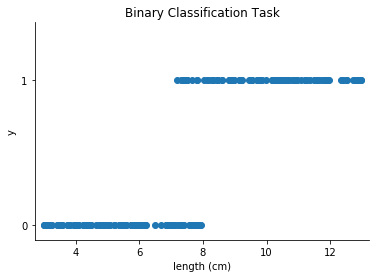

In [9]:
#                                                  CODE:
#                              --------------------------------------------

np.random.seed(5)

n = 100  # number of examples
x = np.concatenate([(5 * np.random.random(n) + 3), (6 * np.random.random(n) + 7)])  # training examples
c = (['orange'] * int(len(x)/2)) + (['banana'] * int(len(x)/2))  # class labels

c_enc = np.array([0] * n + [1] * n)  # encode the labels to 0 - 1

df = pd.DataFrame({'x': x, 'c': c, 'y': c_enc})
df.sort_values('x', inplace=True)

#                                                PLOTTING:
#                              --------------------------------------------

# Create a subplot and scatter the data points
ax = plt.subplot(111)
ax.scatter(x, c_enc)

# Set plot limits
ax.set_xlim([-0.3 + x.min(), x.max() + 0.25])
ax.set_ylim([-0.1, 1.4])

# Set custom labels on the y axis
ax.set_yticks([0, 1])

# Set x and y axis labels
ax.set_xlabel('length (cm)')
ax.set_ylabel('y')

# Rest aesthetic parameters
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('Binary Classification Task')

Since we know how linear regression works, we'll try to use that to solve our binary classification task. First, let's fit a linear regression on the data.

Text(0.5,1,'Linear Regression on binary data')

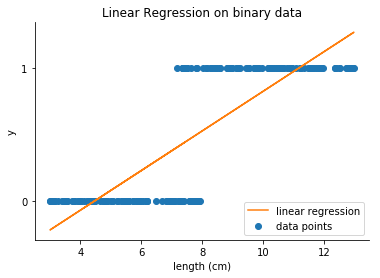

In [10]:
#                                                  CODE:
#                              --------------------------------------------

model = LinearRegression(epochs=50, learning_rate=0.01)
model.b = -0.6  # because the code isn't optimal, this is used to ensure convergeance
model.fit(x, c_enc)
preds = model.predict(x)
df['pred_lr'] = model.predict(df[['x']])

#                                                PLOTTING:
#                              --------------------------------------------

# Draw the data and the linear regression line
ax = plt.subplot(111)
ax.scatter(x, c_enc, label='data points')
ax.plot(x, preds, c='#ff7f0e', label='linear regression')

# Aesthetic parameters
ax.set_xlabel('length (cm)')
ax.set_ylabel('y')

ax.set_yticks([0, 1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(loc='lower right')

ax.set_title('Linear Regression on binary data')

Now by applying a threshold (let's say at $0.5$, which is the middle of the encoded $y$ values), we could use the value of the regression line to classify the given examples.

Text(0.5,1,'Applying a threshold to Linear Regression line')

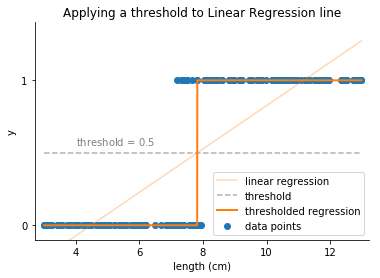

In [11]:
#                                                PLOTTING:
#                              --------------------------------------------

# Scatter the data poitns, the linear regression line, a horizontal line depicting the threshold value
# and the resulting line of the threshold.
ax = plt.subplot(111)
ax.scatter(df.x, df.y, label='data points')
ax.plot(df.x, df.pred_lr, color='#ff7f0e', alpha=0.3, label='linear regression')
ax.plot([df.x.min(), df.x.max()], [0.5, 0.5], color='0.5', alpha=0.6, label='threshold', linestyle='--')
ax.plot(df.x, np.where(df.pred_lr > 0.5, 1, 0), color='#ff7f0e', lw=2, label='thresholded regression')

# Add a text box above the threshold line
ax.text(4, 0.55, 'threshold = $0.5$', color='0.5')

# Aesthetic parameters
ax.set_xlim([-0.3 + df.x.min(), df.x.max() + 0.25])
ax.set_ylim([-0.1, 1.4])

ax.set_xlabel('length (cm)')
ax.set_ylabel('y')

ax.set_yticks([0, 1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.legend()

ax.set_title('Applying a threshold to Linear Regression line')

This way we have a working model of how we can classify a fruit into a *banana* or an *orange* depending on its length:

1. Predict it's $y$ value through the trained Linear Regression.
2. See if that $y$ is above or below the threshold. Above means its a *banana*, below means its an *orange*.

This approach however has one problem. We can't tell how *sure* the algorithm is of its prediction. For example, say we have two fruits, one with $x=4$ and another with $x=7.5$. Both would be classified as *oranges*, but the first one is much more likely to be an orange than the second. Ideally, we would want a way for the algorithm to tell us how *sure* it is for a certain prediction, or the **probability** of an example belonging to each class.

By applying a [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) (denoted $\sigma$) to the linear regression output we can do just that. This approach is called **logistic regression** and while the name may be confusing, *logistic regression* is actually a classification algorithm (not a regression one)! The output of logistic regression is:

$$
\hat y = \sigma \left(X \cdot W + b \right)
$$

where $\sigma$ is the sigmoid function $\sigma(x) = \frac{1}{(1 + e^{-x})}$.

When trained, logistic regression should look like this:

![logistic regression](https://i.imgur.com/tZiNaaS.png)

Again, the orange line represents the *probability* of $x$ belonging to class $1$ (i.e. *bananas*).

Because of the nautre of the problem (i.e. classification), we'll need to define a new cost function to train logistic regression. We won't go into much depth on this just yet. You can find an interesting tutorial building a logistic regression model from scratch [here](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc).

## Multi-class classification

What if we had more than two classes?  
Suppose we had a classification problem with $K$ classes. Now each label would look like this:

$$
y_i = \left( \begin{array}{ccccc} 
0 & 1 & 0 & ... & 0
\end{array} \right)
$$

This is called a **one-hot** vector, where all elements, besides one, take the value of $0$. The above is a one-hot vector of an example from the second class (because the second element is $1$).

The output of logistic regression would look like this:

$$
\hat y = S(X \cdot W + b) = S \left( \left( \begin{array}{cccc}
x_{11} & x_{12} & ... & x_{1M} \\
x_{21} & x_{22} & ... & x_{2M} \\
... & ... & ... & ... \\
x_{N1} & x_{N2} & ... & x_{NM} 
\end{array} \right) \cdot
\left( \begin{array}{cccc}
w_{11} & w_{12} & ... & w_{1K} \\
w_{21} & w_{22} & ... & w_{2K} \\
... & ... & ... & ... \\
x_{M1} & x_{M2} & ... & x_{MK} 
\end{array} \right) + 
\left( \begin{array}{c}
b_1 \\
b_2 \\
... \\
b_k \\
\end{array} \right)
\right)
$$

While the training examples ($X$) stayed the same, the weights ($W$) are now an $M \times K$ array. This means that we have a **separate weight for each feature and each class**. Likewise, we have a **separate bias for each class**. $S$ is the [softmax function](https://en.wikipedia.org/wiki/Softmax_function).

Similar to the sigmoid function before, softmax also converts the linear regression outputs to **probabilities**. The output of the model is the probability of the example belonging to each of the $K$ classes.

Logistic Regression isn't a very *strong* classifier, as it follows the same basic assumptions of linear regression. We'll learn more supervised and unsupervised algorithms in the future. Covering these two ML algorithms introduced us to many basic concepts of Machine Learning. Concepts like *regression*, *classification*, *cost function*, *training phase*, *Gradient Descent*, *epoch*, *learning rate*, etc., which are important to understand Machine Learning.